# Trainer Demo

In [7]:
# enable auto-reloading submodules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Init Trainer

In [8]:
from trainer import Trainer

trainer = Trainer(
    # target pathogen
    pathogen='Escherichia coli',
    # number of folds
    n_splits=5,
    # DRIAMS sites
    sites=['A'],
    # the years of the data to load
    years=[2015, 2016, 2017, 2018],
)

## Training

In [9]:
from lightgbm import LGBMClassifier

# Ceftriaxone
trainer.fit(
    drug='Ceftriaxone',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.05,
        n_estimators=10,
    )
)
# Ciprofloxacin
trainer.fit(
    drug='Ciprofloxacin',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.02,
        n_estimators=15,
    )
)
# Cefepime
trainer.fit(
    drug='Cefepime',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.01,
        n_estimators=20,
    )
)

Loading Ceftriaxone...
Training w/o SMOTE...
Fold 1/5...
AUC=0.5615668202764977, ACC=0.8074596774193549, f1=0.22040816326530616
Fold 2/5...
AUC=0.5391705069124424, ACC=0.7983870967741935, f1=0.14529914529914528
Fold 3/5...
AUC=0.5552995391705069, ACC=0.8054435483870968, f1=0.19917012448132781
Fold 4/5...
AUC=0.5701382488479262, ACC=0.8104838709677419, f1=0.24800000000000003
Fold 5/5...
AUC=0.5483870967741935, ACC=0.8024193548387096, f1=0.17647058823529413
Training w/ SMOTE...
Fold 1/5...
AUC=0.7659907834101383, ACC=0.8417338709677419, f1=0.6357308584686775
Fold 2/5...
AUC=0.7399078341013825, ACC=0.8346774193548387, f1=0.6019417475728155
Fold 3/5...
AUC=0.755115207373272, ACC=0.8377016129032258, f1=0.6211764705882353
Fold 4/5...
AUC=0.7484792626728111, ACC=0.8377016129032258, f1=0.6139088729016786
Fold 5/5...
AUC=0.7346543778801843, ACC=0.813508064516129, f1=0.5823927765237019
Loading Ciprofloxacin...
Training w/o SMOTE...
Fold 1/5...
AUC=0.5, ACC=0.7147302904564315, f1=0.0
Fold 2/5...


KeyboardInterrupt: 

## Results Collection

In [ ]:
results = trainer.collect_results()
# export the results to csv files
# results.save_to('./results/test')

## Bar Graph

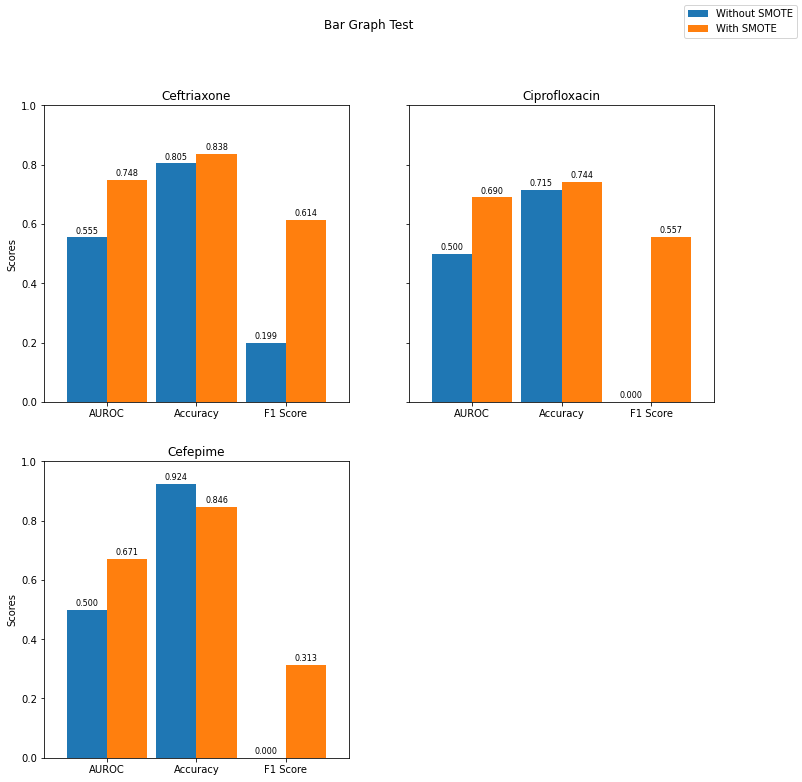

In [ ]:
results.bar_plot(
    title='Bar Graph Test',
    # save_as='./results/test/bar.png',
    # drugs=['Ceftriaxone', 'Ciprofloxacin', 'Cefepime'],
    # metrics=['AUROC', 'Accuracy', 'F1 Score'],
    nrows=2,
    ncols=2,
    sharey=True,
    figsize=(12, 12),
    y_lim=(0, 1),
)

## Box Graph

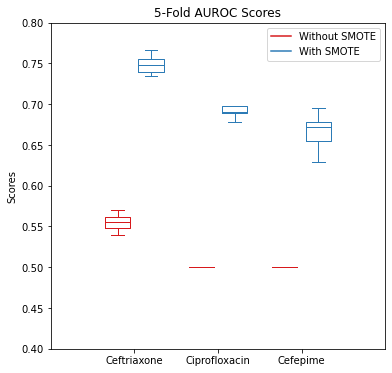

In [10]:
results.box_plot(
    # title='Box Graph Test',
    # save_as='./plots/box_test.png',
    subtitle_template='5-Fold {} Scores', # format subtitles (`{}` will be replaced with metrics' name)
    # drugs=['Ceftriaxone', 'Ciprofloxacin', 'Cefepime'],
    metrics=['AUROC'], # plot AUROC only
    y_lim=[0.4, 0.8], # set view limits for y-axis
    figsize=(6, 6),
)